## This notebook is to compare the relative abundances of various phyla across samples and treatments

In [1]:
# Loading R packages
library(reshape)
library(ggplot2)
library(phyloseq)
library(plyr)
library(dplyr)
library(plotly)
library(wesanderson)

Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”
Attaching package: ‘plyr’

The following objects are masked from ‘package:reshape’:

    rename, round_any


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:reshape’:

    rename

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘plotly’ was built under R version 3.3.2”
Attaching package: ‘plotly’

The following objects are masked from ‘package:plyr’:

    arrange, mutate, rename, summarise

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:reshape’:

    rename

The following object is masked from ‘package:stats’:

    filter

The following object is

### Importing and prepping the data

In [2]:
# Importing the dataset
ps = import_biom("../../data/Seq_data/QIIME_maxee2/OTU_table/feature-table-metaD-tax2.biom",parseFunction=parse_taxonomy_greengenes, "../../data/Seq_data/QIIME_maxee2/OTU_table/Trees3/fulltree2.tre")
#ps = import_biom("../OTU_table/feature-table-metaD-tax.biom",parseFunction=parse_taxonomy_greengenes,"../OTU_table/Trees/fulltree.tre")

Warning message in strsplit(msg, "\n"):
“input string 1 is invalid in this locale”

In [3]:
# Setting various parameters as combined values
sample_data(ps)$pH = as.numeric(sample_data(ps)$pH)
sample_data(ps)$Total_C_pct = as.numeric(sample_data(ps)$TC_pct)
sample_data(ps)$Total_N_pct = as.numeric(sample_data(ps)$Total_N_pct)
sample_data(ps)$Total_S_pct = as.numeric(sample_data(ps)$Total_S_pct)
sample_data(ps)$Burn_Severity_Index= as.numeric(sample_data(ps)$Burn_Severity_Index)
sample_data(ps)$CBI= as.numeric(sample_data(ps)$CBI)
sample_data(ps)$RBR= as.numeric(sample_data(ps)$RBR)
sample_data(ps)$CFSI= as.numeric(sample_data(ps)$CFSI)
sample_data(ps)$Mean_Duff_Depth_cm = as.numeric(sample_data(ps)$Mean_Duff_Depth_cm)
sample_data(ps)$Understory_CBI= as.numeric(sample_data(ps)$Understory_CBI)
sample_data(ps)$Overstory_CBI= as.numeric(sample_data(ps)$Overstory_CBI)
sample_data(ps)$Overstory_CBI= as.numeric(sample_data(ps)$Overstory_CBI)
sample_data(ps)$Dead_Trees= as.numeric(sample_data(ps)$Dead_Trees)
sample_data(ps)$Pct_Exposed_Mineral= as.numeric(sample_data(ps)$Pct_Exposed_Mineral)
sample_data(ps)$dc = as.numeric(sample_data(ps)$dc)
sample_data(ps)$fwi = as.numeric(sample_data(ps)$fwi)
sample_data(ps)$dmc = as.numeric(sample_data(ps)$dmc)
sample_data(ps)$ffmc = as.numeric(sample_data(ps)$ffmc)
sample_data(ps)$TotalSeqs=sample_sums(ps)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, e

In [4]:
# Pulling out samples from this project only
ps.wb = prune_samples(sample_data(ps)$Project_ID=="WB15", ps)

In [5]:
# Merging lab replicates for analysis
ps.merged = merge_samples(ps.wb, "Sample_ID")

# This sums the OTUs for each sample ID, and averages the sample data
# That's an issue for the non-numeric sample data, so we have to add it back in.
# The code below is probably inefficient, but it works correctly.
names=colnames(sample_data(ps.wb))
notcommonnames = c('Sample_Name','Replicate','Project_ID','Fwd_Primer_Barcode','Rev_Primer_Barcode','Revcomp_Rev_Primer_Barcode')
commonnames = names[(names %in% notcommonnames)]
common_sample_data = sample_data(ps.wb)[ , -which(names(sample_data(ps.wb)) %in% commonnames)]
commonrownames=row.names(sample_data(ps.merged))
common_sample_data2 = common_sample_data[which(common_sample_data$Sample_ID %in% commonrownames),]
common_sample_data2 = common_sample_data2[!duplicated(common_sample_data2$Sample_ID), ]
row.names(common_sample_data2) = common_sample_data2$Sample_ID
sample_data(ps.merged)=common_sample_data2

Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMeth

In [6]:
ps.merged.norm = transform_sample_counts(ps.merged, function(x) x / sum(x) )

In [7]:
ps.merged.norm

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9092 taxa and 112 samples ]
sample_data() Sample Data:       [ 112 samples by 66 sample variables ]
tax_table()   Taxonomy Table:    [ 9092 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9092 tips and 9088 internal nodes ]

## Looking to see if there are barcode biases

In [ ]:
mdf = psmelt(ps.wb)

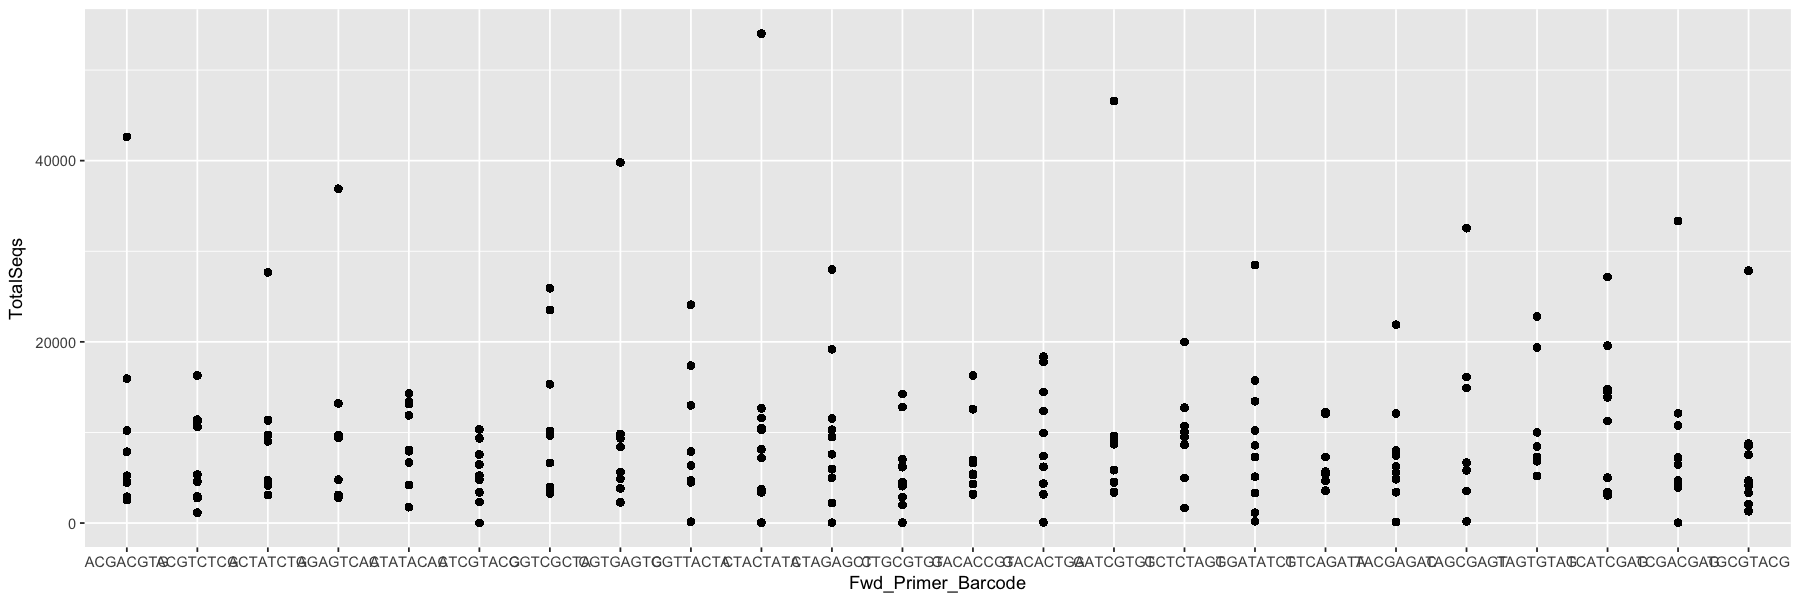

In [29]:
options(repr.plot.width=15, repr.plot.height=5)
p = ggplot(mdf,aes(x=Fwd_Primer_Barcode, y=TotalSeqs))
p = p + geom_point()
p
# No clear evidence of bias against one barcode

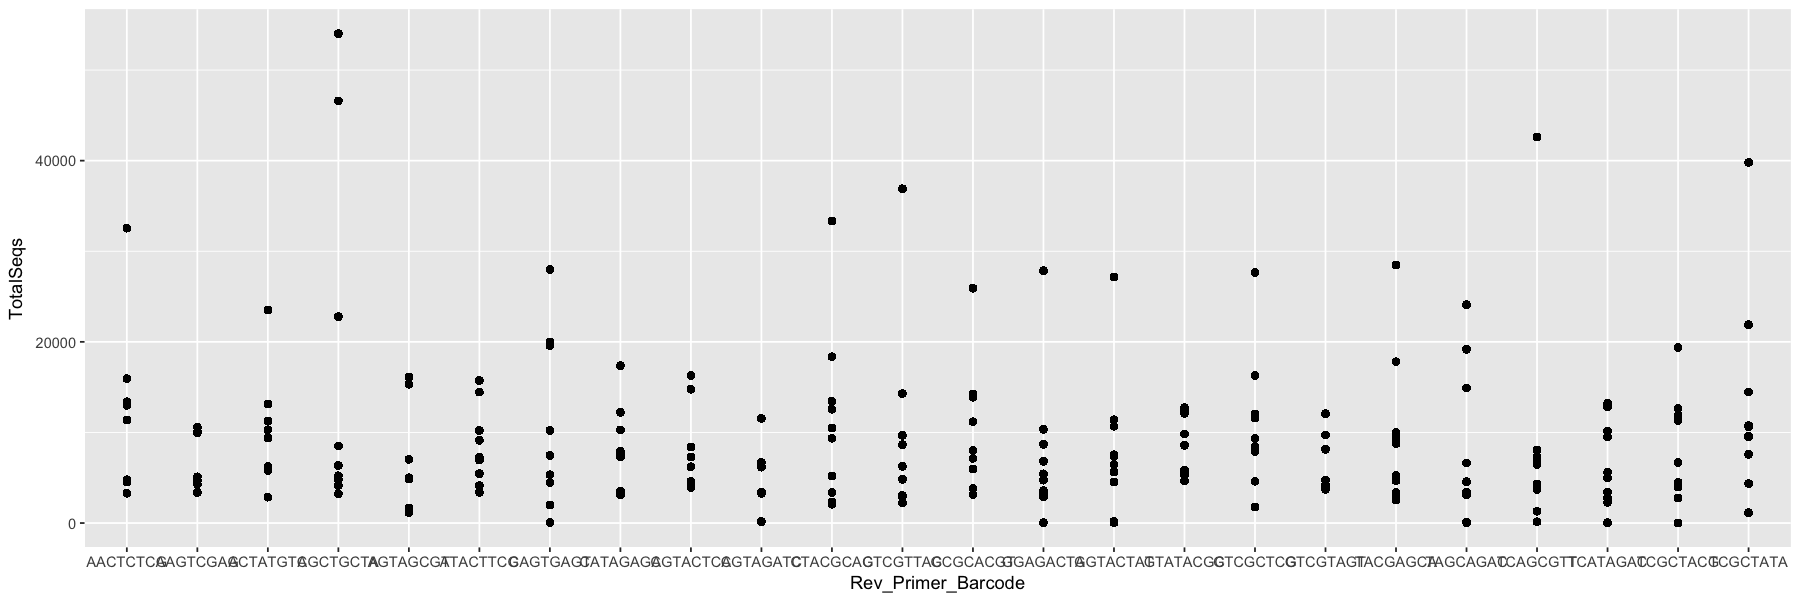

In [30]:
options(repr.plot.width=15, repr.plot.height=5)
p = ggplot(mdf,aes(x=Rev_Primer_Barcode, y=TotalSeqs))
p = p + geom_point()
p
# No clear evidence of bias against one barcode

## Making the classic stacked bar plot

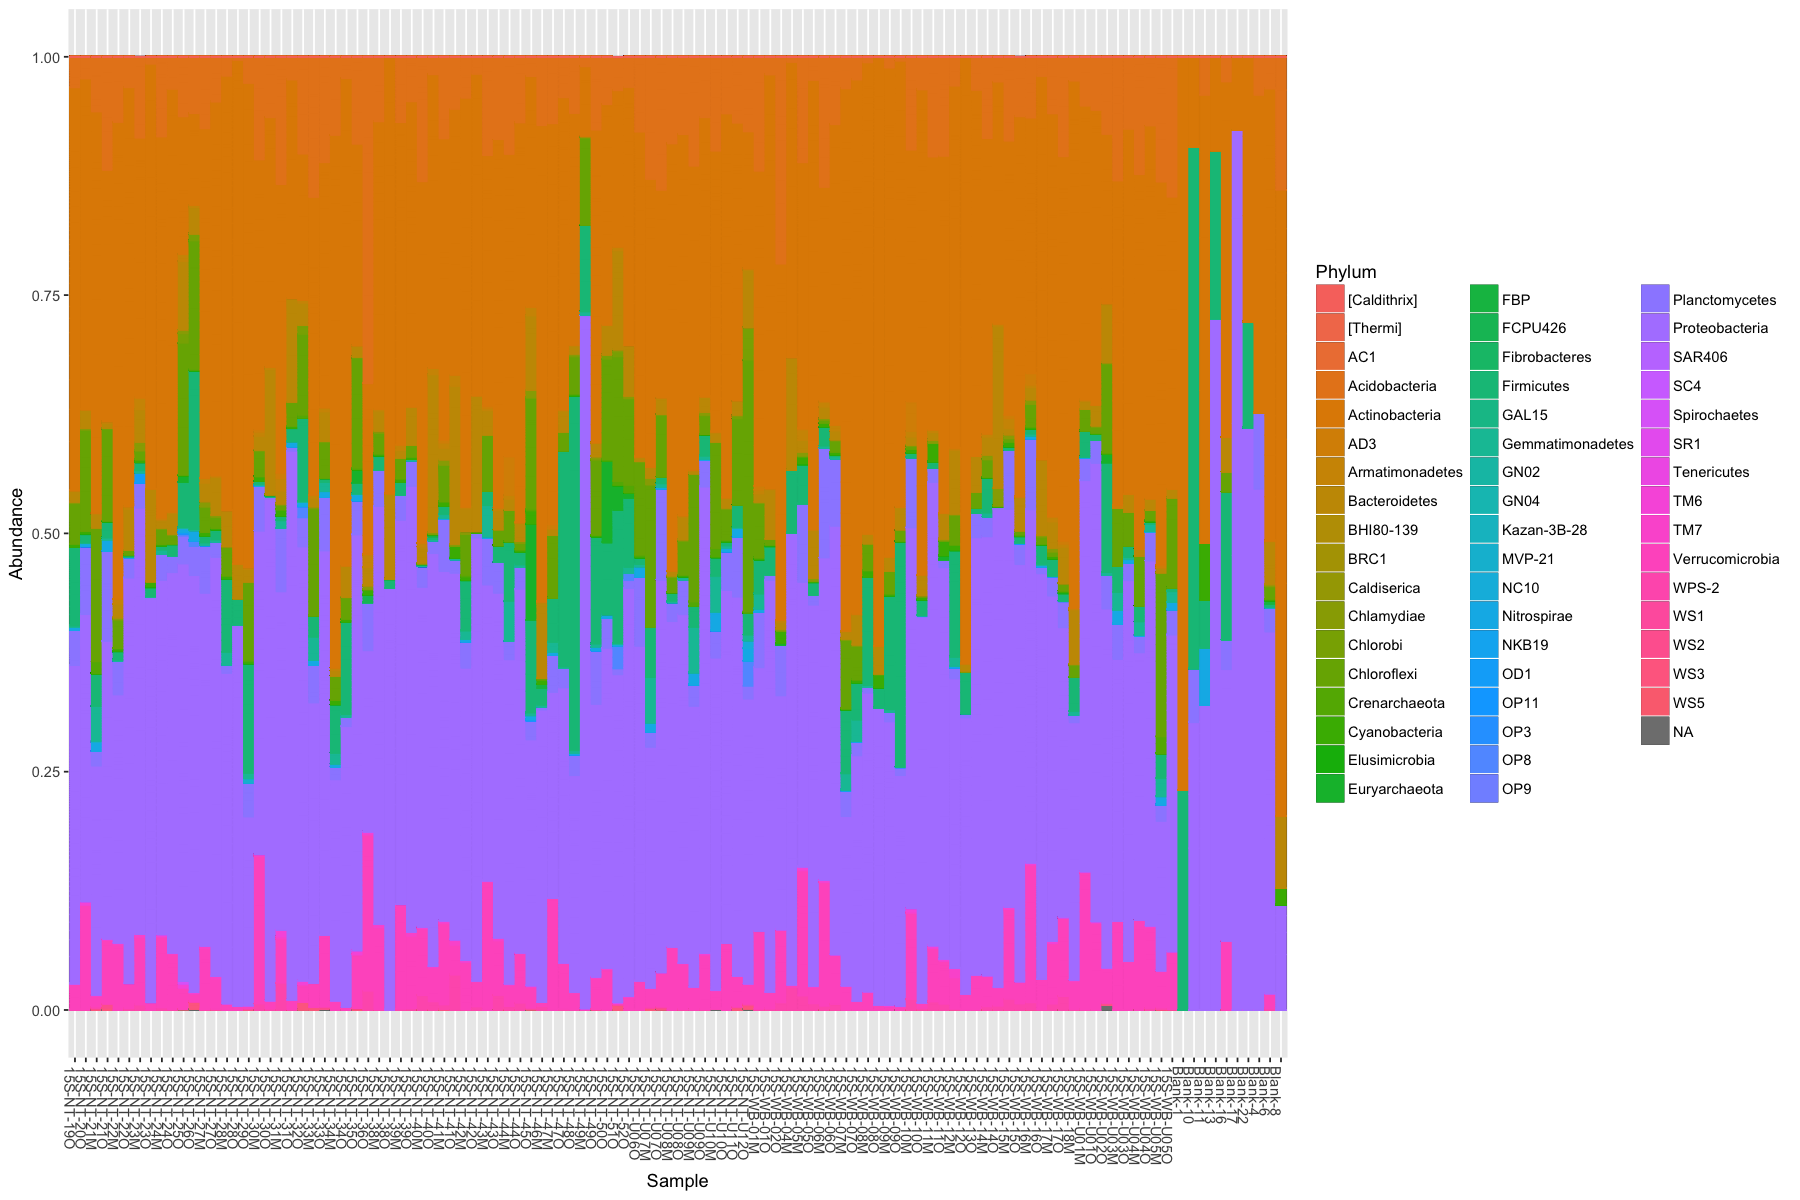

In [8]:
options(repr.plot.width=15, repr.plot.height=10)
plot_bar(ps.merged.norm, fill="Phylum") + geom_bar(aes(color=Phylum, fill=Phylum), stat="identity", position="stack")

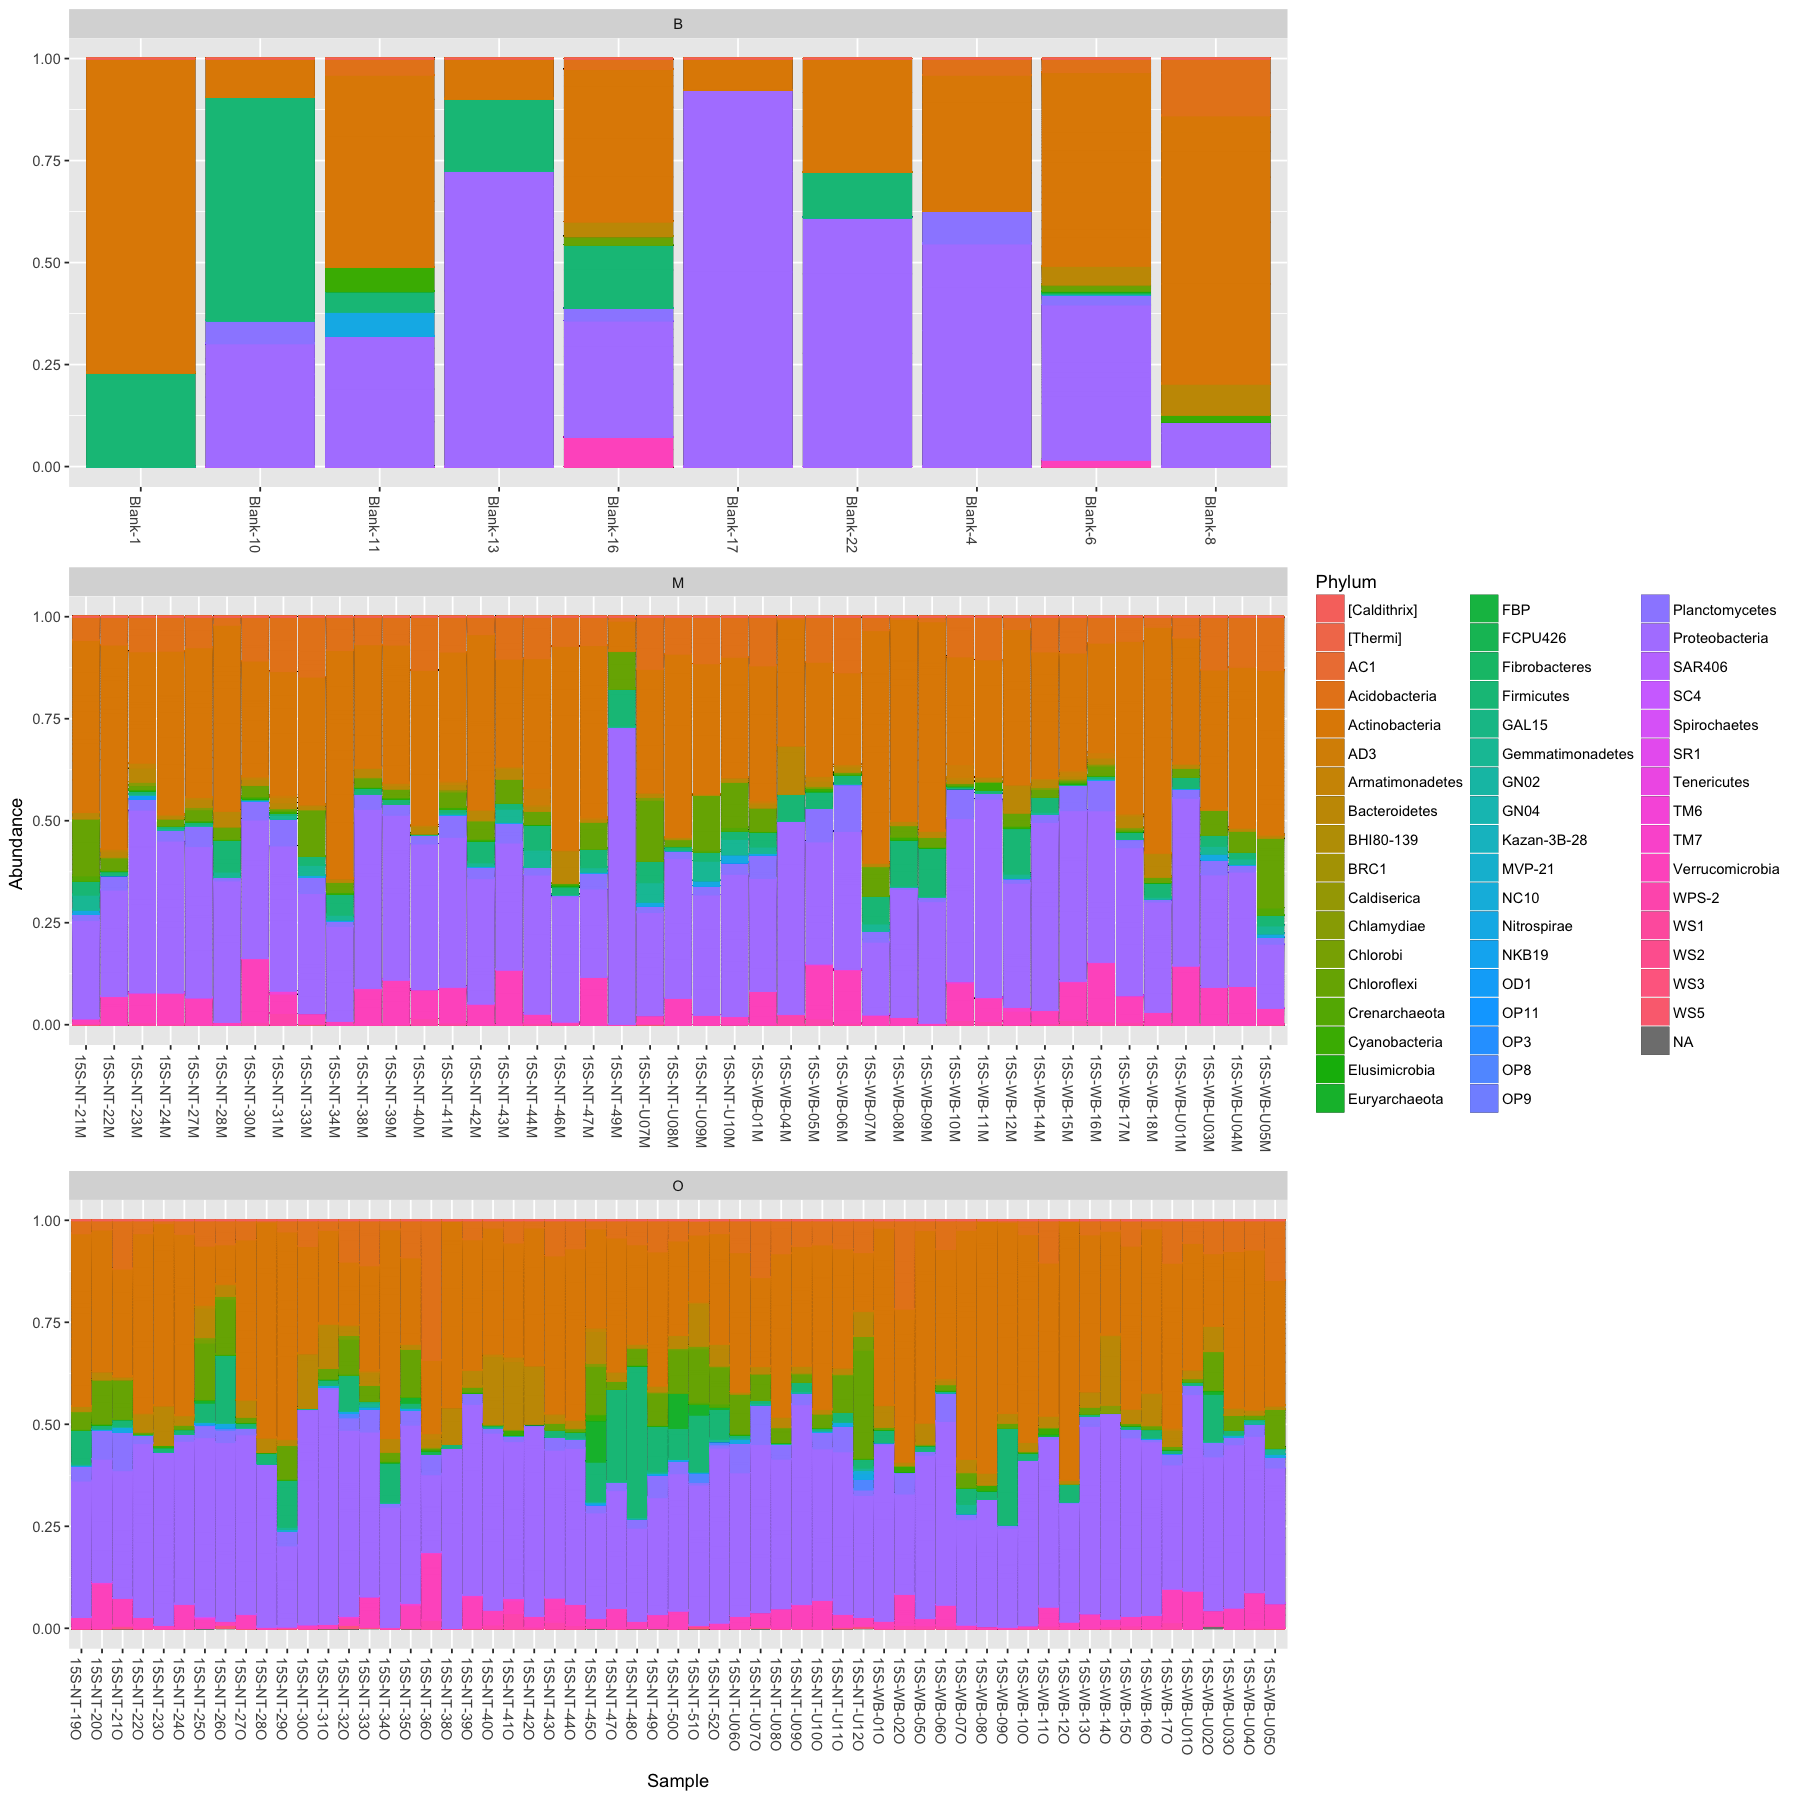

In [9]:
options(repr.plot.width=15, repr.plot.height=15)
plot_bar(ps.merged.norm, fill="Phylum") + geom_bar(aes(color=Phylum, fill=Phylum), stat="identity", position="stack") + facet_wrap(~Org_or_Min,scales="free",ncol=1)

In [11]:
d = psmelt(ps.merged.norm)

In [16]:
df = d %>%
    group_by(Sample,Phylum)%>%
    mutate(Relabund=sum(Abundance))

cutoff=0.005

CommonPhyla = df %>%
    group_by(Phylum)%>%
    summarize(MeanRelabund=mean(Relabund), MaxRelabund = max(Relabund))%>%
    filter(MeanRelabund>cutoff | MaxRelabund>cutoff)

print(c(paste(dim(CommonPhyla)[1],"most abundant phyla")))

CommonPhyla = as.matrix(CommonPhyla)[,1]

df = df %>%
    filter(Phylum %in% CommonPhyla)%>%
    filter(Org_or_Min != "B")

[1] "26 most abundant phyla"


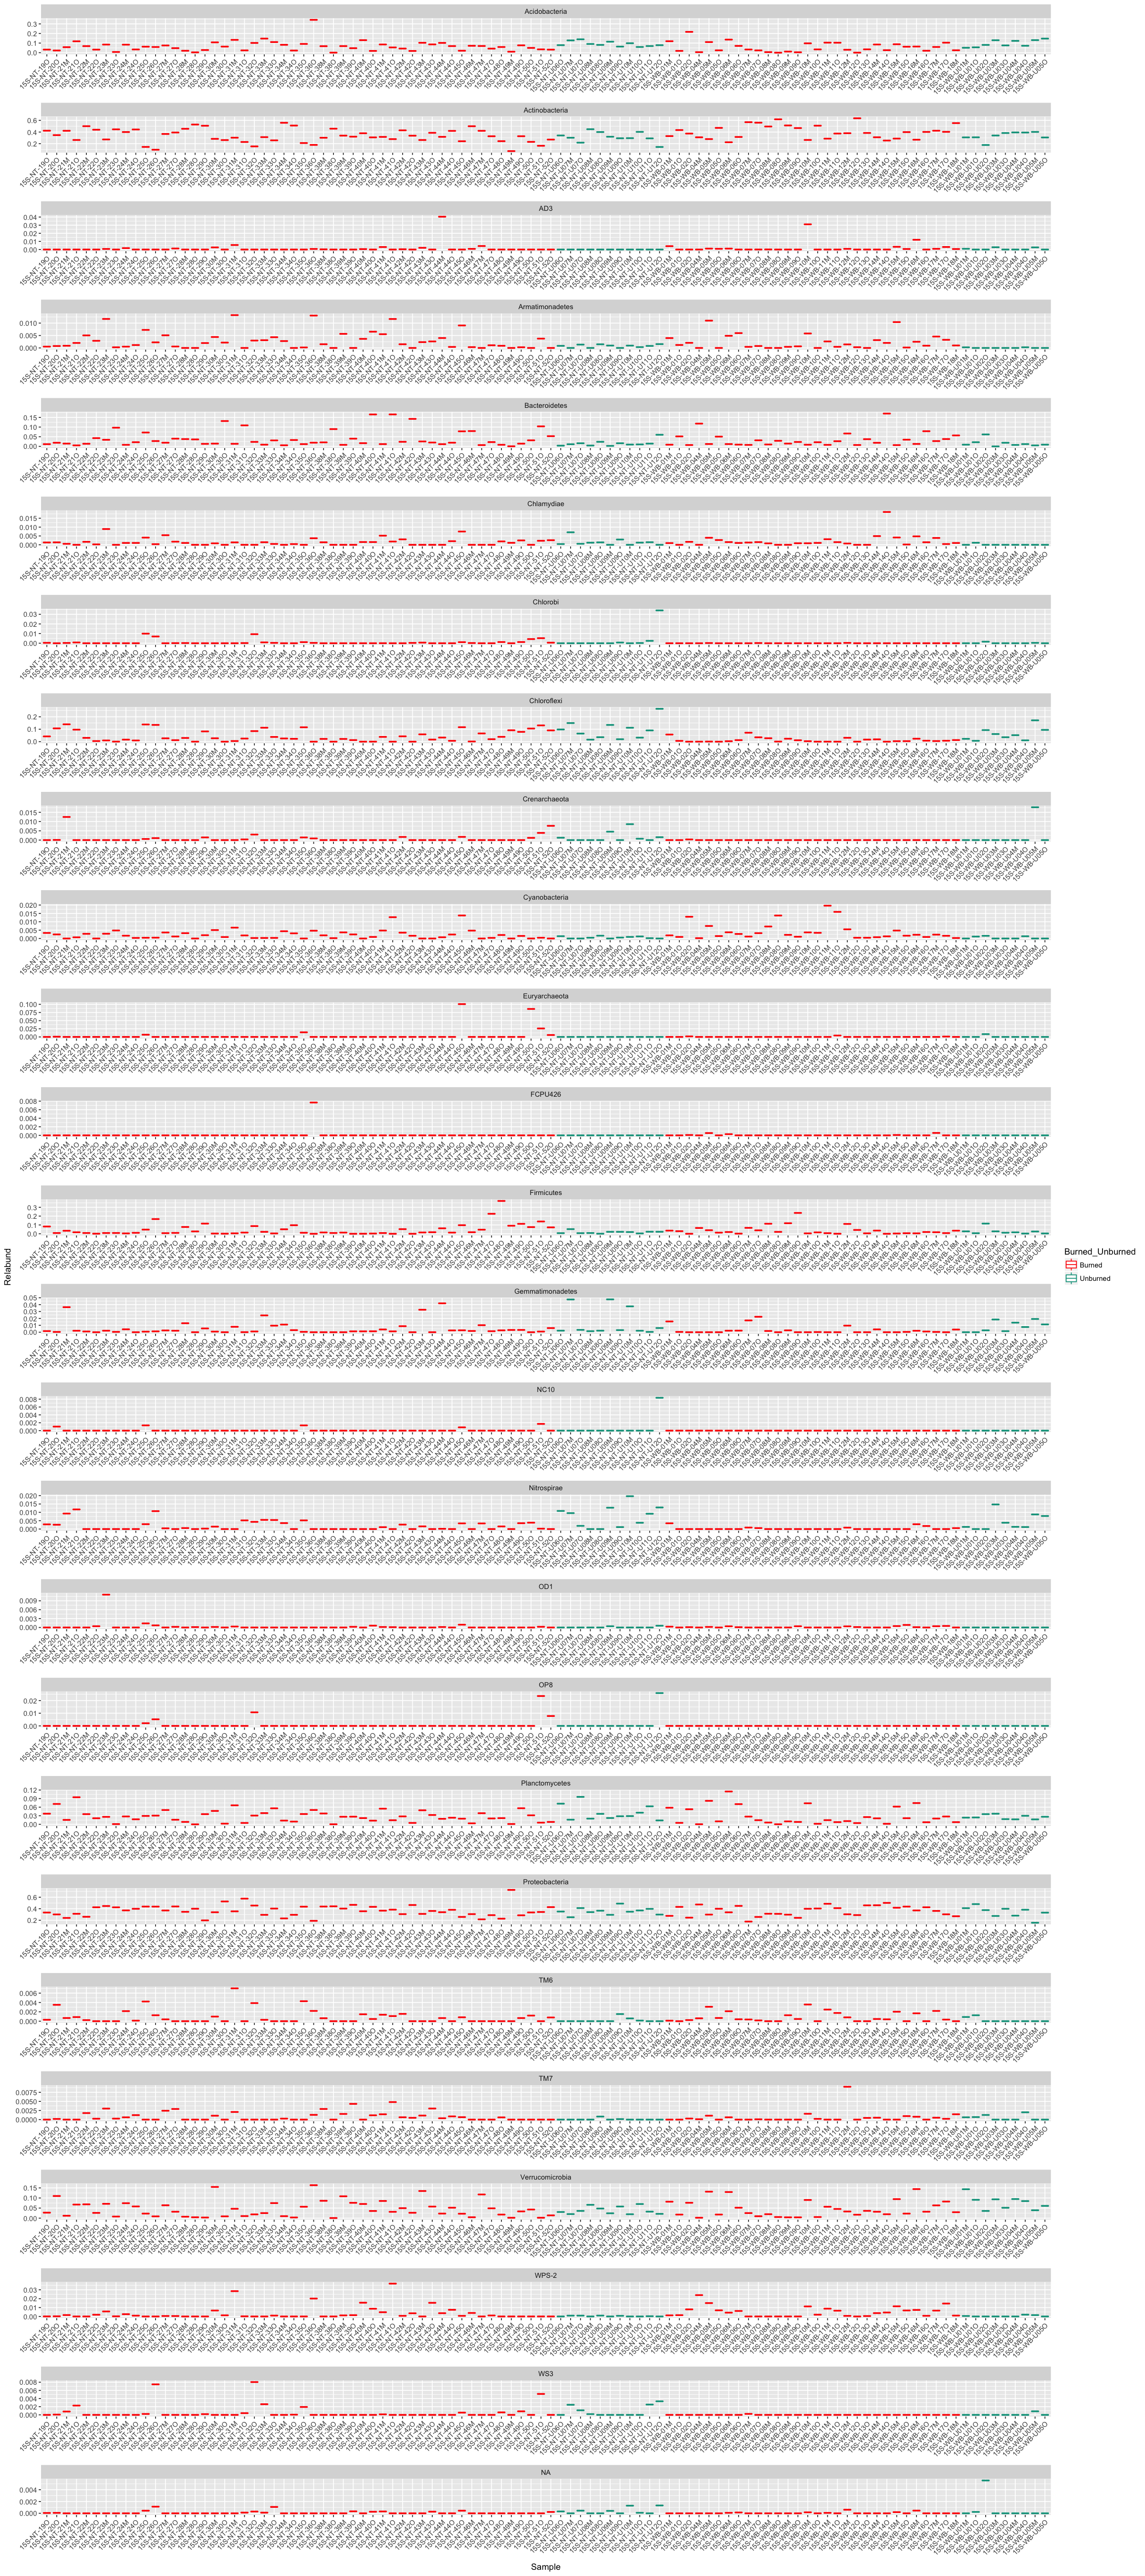

In [18]:
options(repr.plot.width=20, repr.plot.height=45)
p = ggplot(df,aes(x=Sample, y=Relabund, color=Burned_Unburned))
p = p + geom_boxplot() + facet_wrap(~Phylum, scales="free", ncol=1)
p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1))
p = p + scale_color_manual(values=wes_palette("Darjeeling"))
p

In [14]:
df = d %>%
    group_by(Sample,Order)%>%
    mutate(Relabund=sum(Abundance))

cutoff=0.001

CommonTax = df %>%
    group_by(Order)%>%
    summarize(MeanRelabund=mean(Relabund), MaxRelabund = max(Relabund))%>%
    filter(MeanRelabund>cutoff | MaxRelabund>cutoff)

print(c(paste(dim(CommonTax)[1],"most abundant taxa")))

CommonTax = as.matrix(CommonTax)[,1]

df = df %>%
    group_by(Sample)%>%
    filter(Order %in% CommonTax)

[1] "152 most abundant taxa"


Warning message:
“Removed 88300 rows containing missing values (geom_point).”

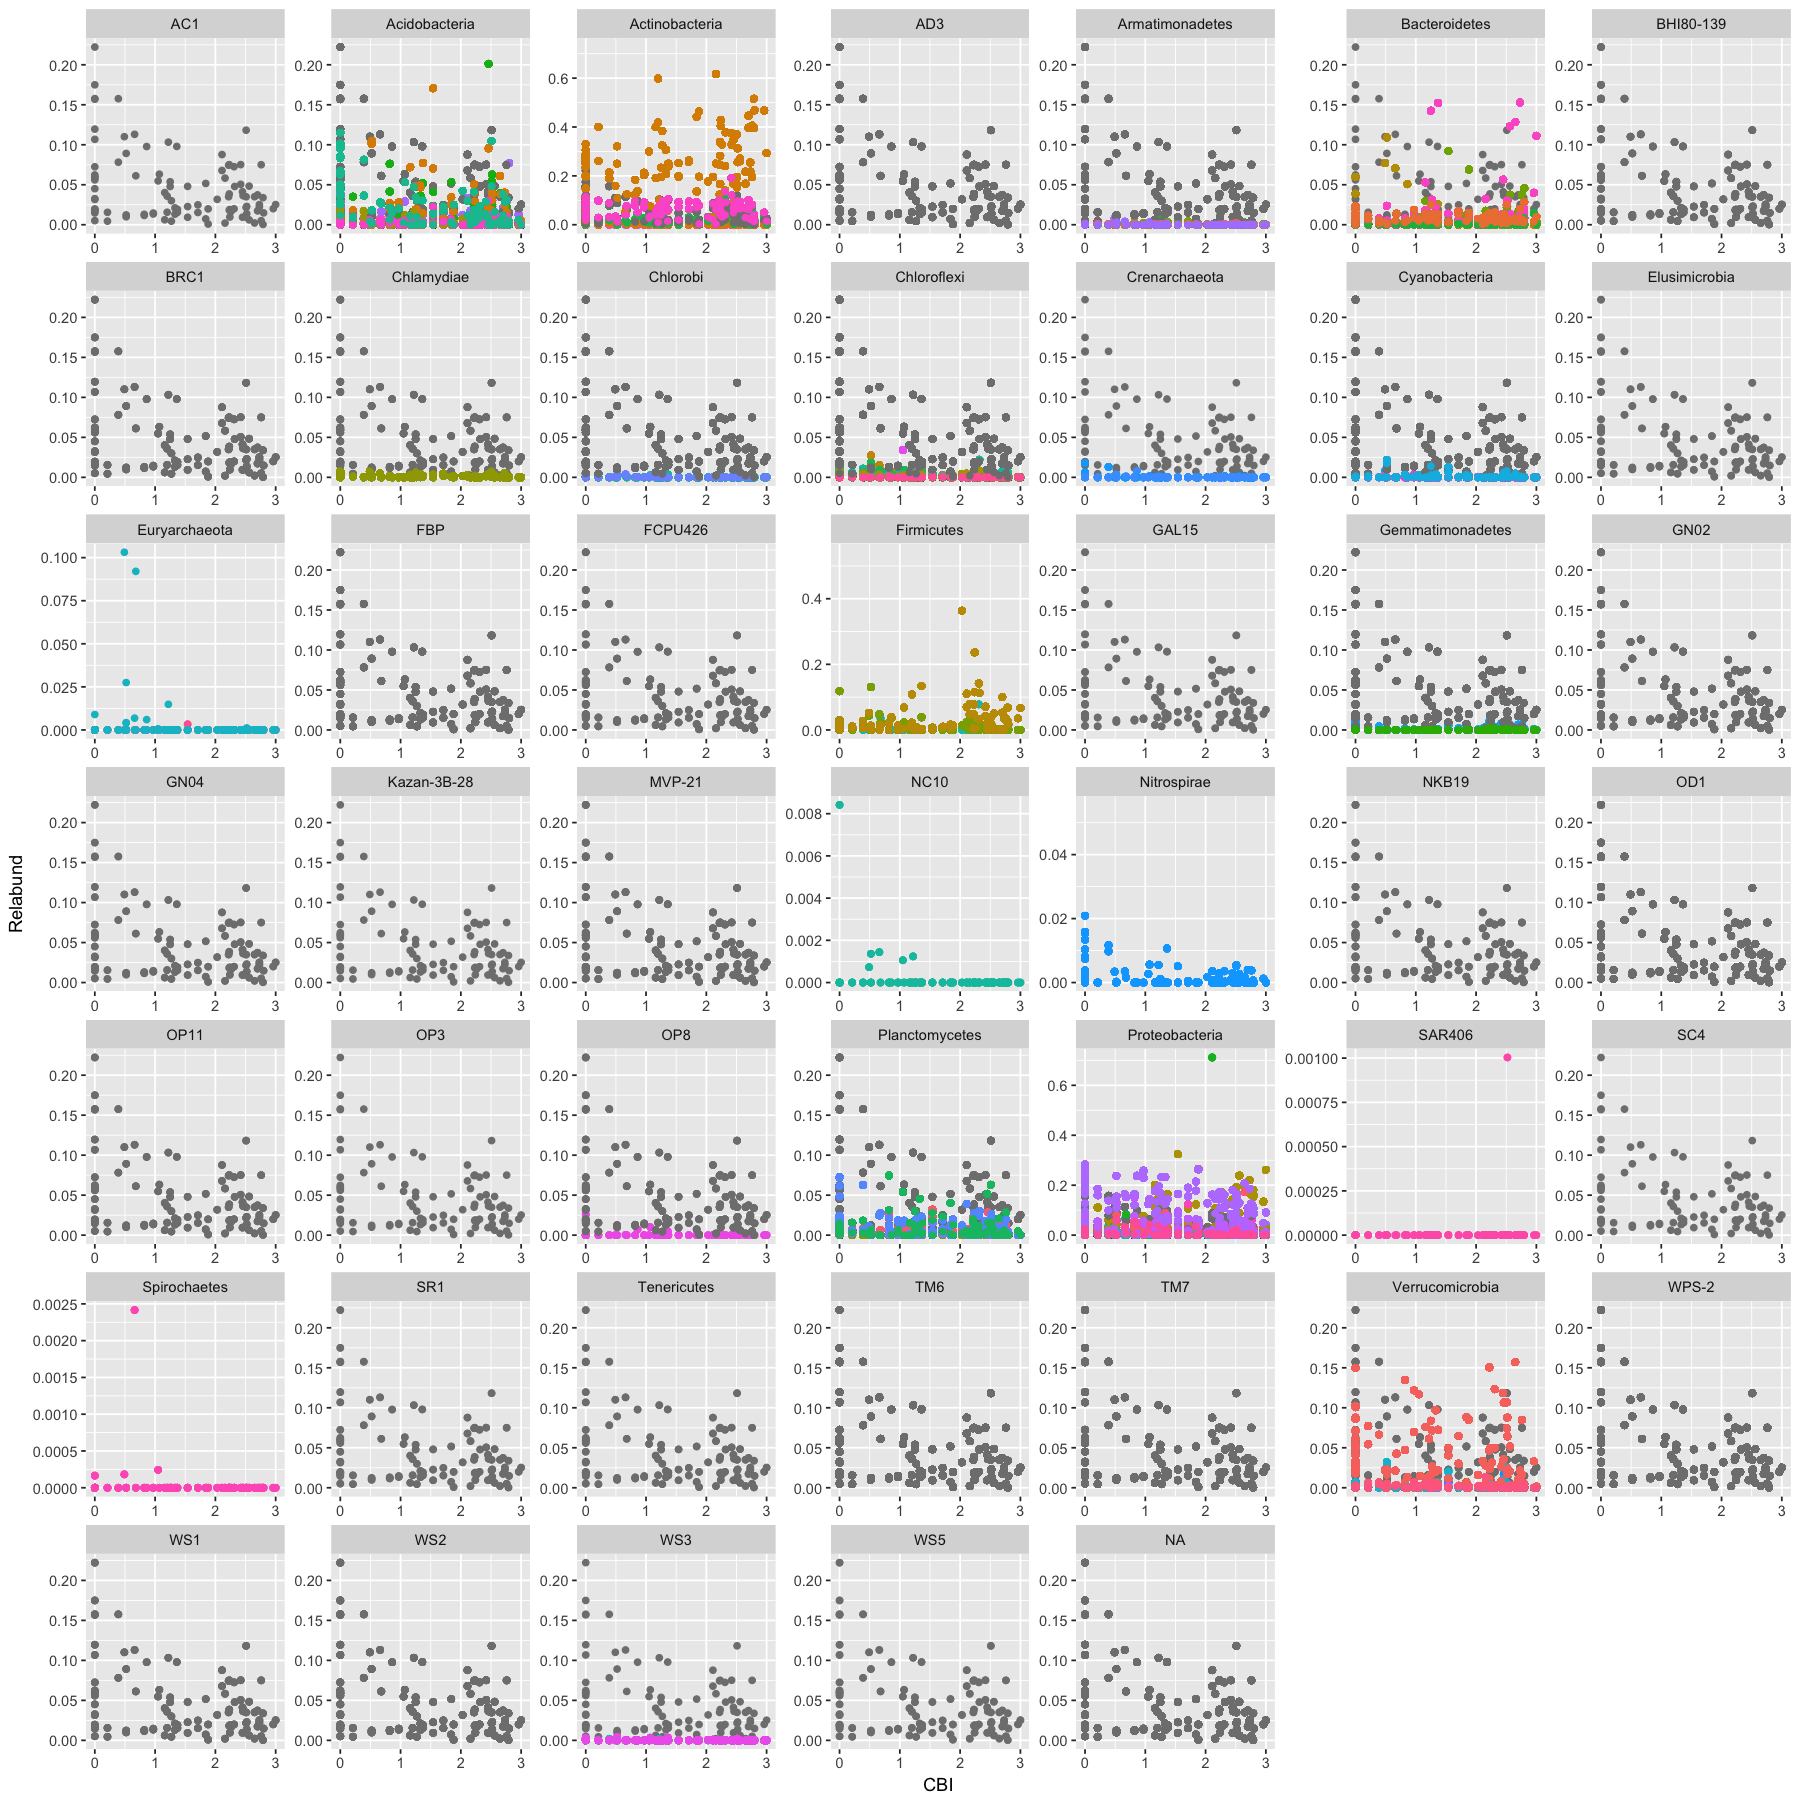

In [15]:
p = ggplot(df)
p = p + geom_point(aes(x=CBI, y=Relabund, color=Order)) + facet_wrap(~Phylum, scales="free")
p = p + guides(color=FALSE)
p

## Zooming in on individual phyla
Actinobacteria class may increase with burn severity; AlphaProteo down; Betaproteo up?

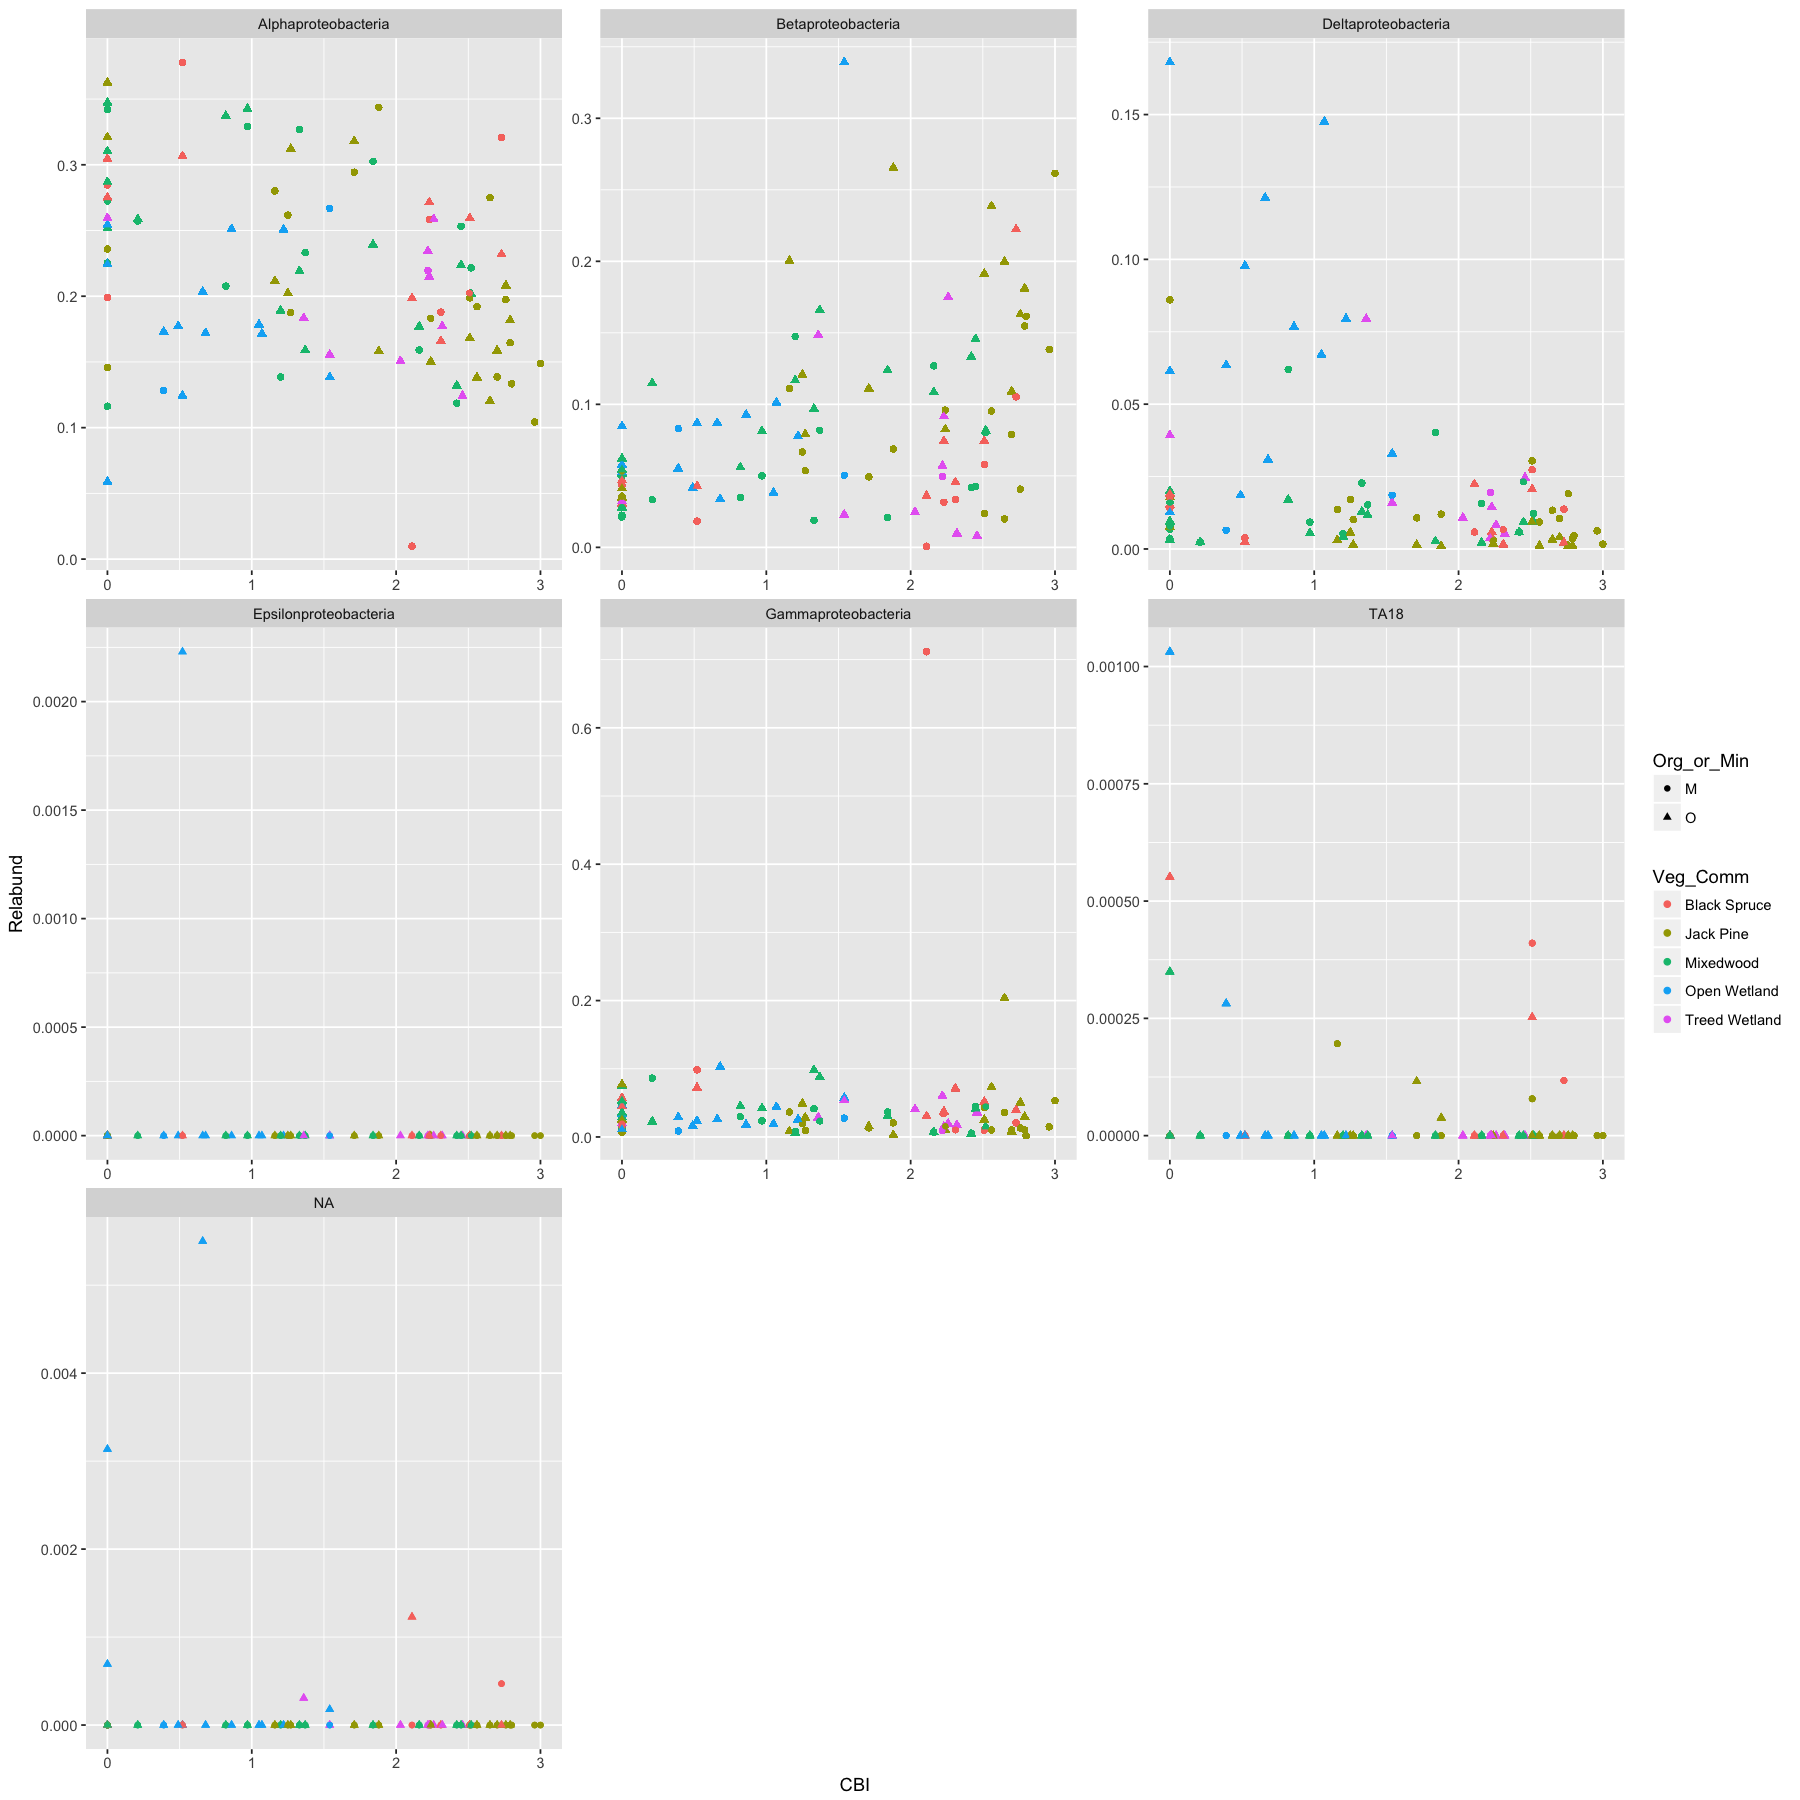

In [16]:
minseqs = 750

df = d %>%
    filter(Phylum=="Proteobacteria")%>%
    filter(TotalSeqs>minseqs)%>%
    group_by(Sample,Class)%>%
    mutate(Relabund=sum(Abundance))%>%
    filter(Org_or_Min != "B")

p = ggplot(df, aes(x=CBI, y=Relabund, color=Veg_Comm, shape=Org_or_Min)) + geom_point() + facet_wrap(~Class, scales="free")
#p = p + guides(color=FALSE)
p

## Zooming in on classes
Rhizobiales may decrease with increasing burn severity; Actinomycetes up with burn severity

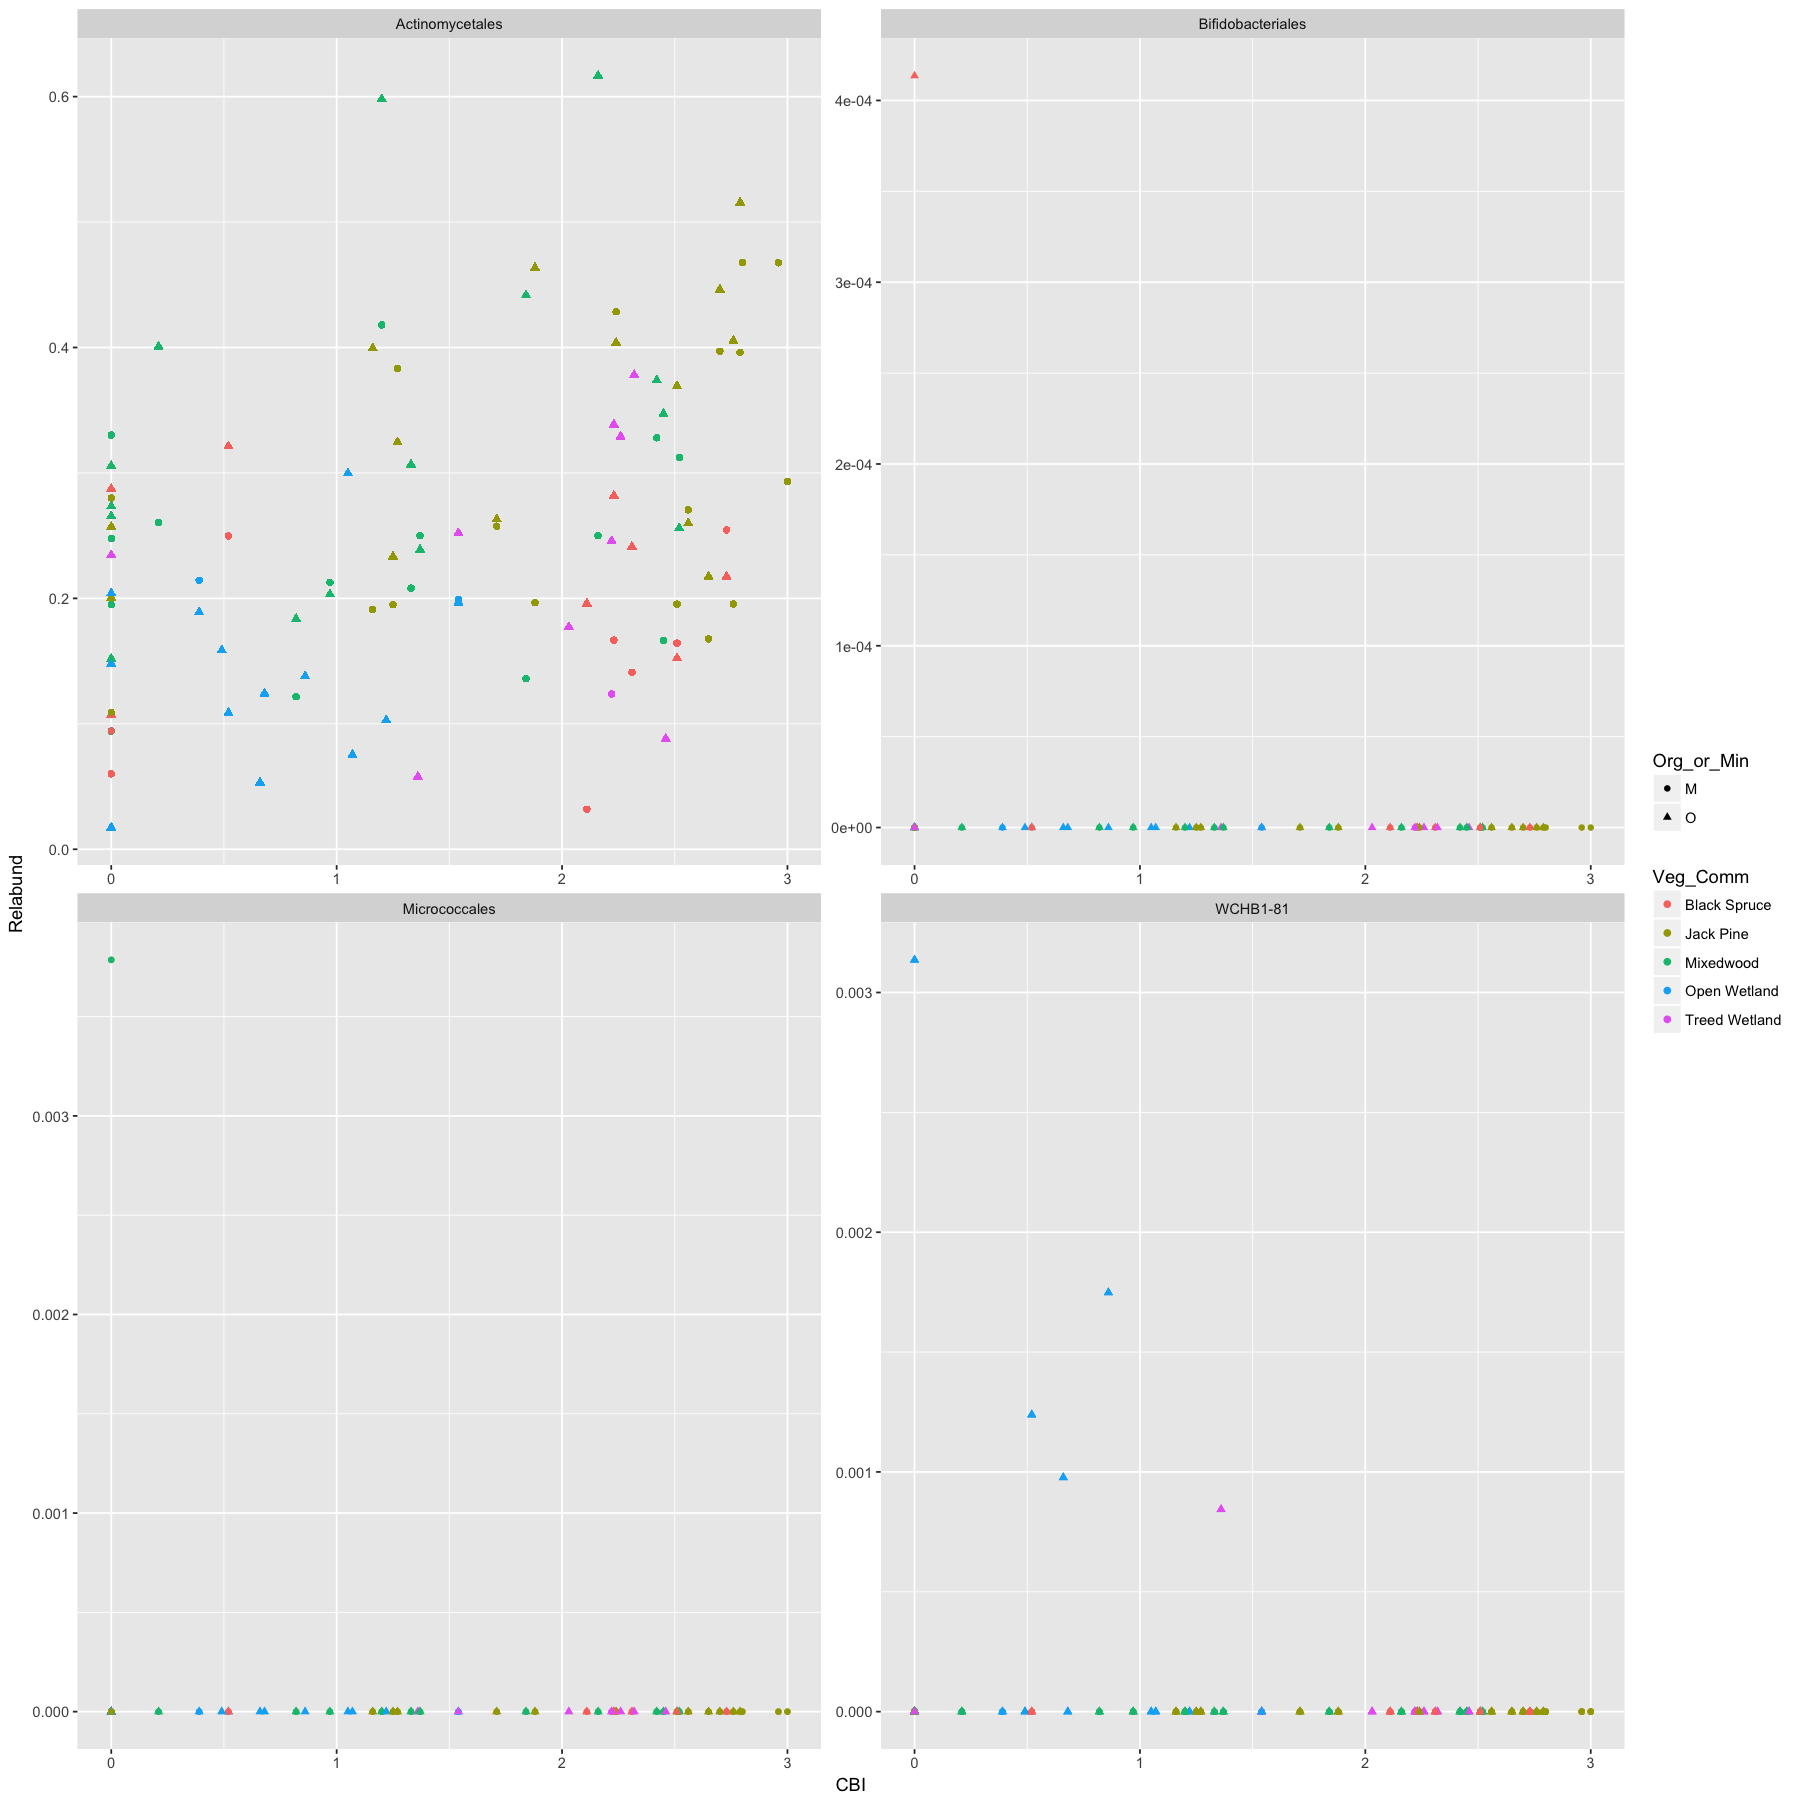

In [17]:
minseqs = 50

df = d %>%
    filter(Class=="Actinobacteria")%>%
    filter(TotalSeqs>minseqs)%>%
    group_by(Sample,Order)%>%
    mutate(Relabund=sum(Abundance))%>%
    filter(Org_or_Min != "B")

p = ggplot(df, aes(x=CBI, y=Relabund, color=Veg_Comm, shape=Org_or_Min)) + geom_point() + facet_wrap(~Order, scales="free")
#p = p + guides(color=FALSE)
p

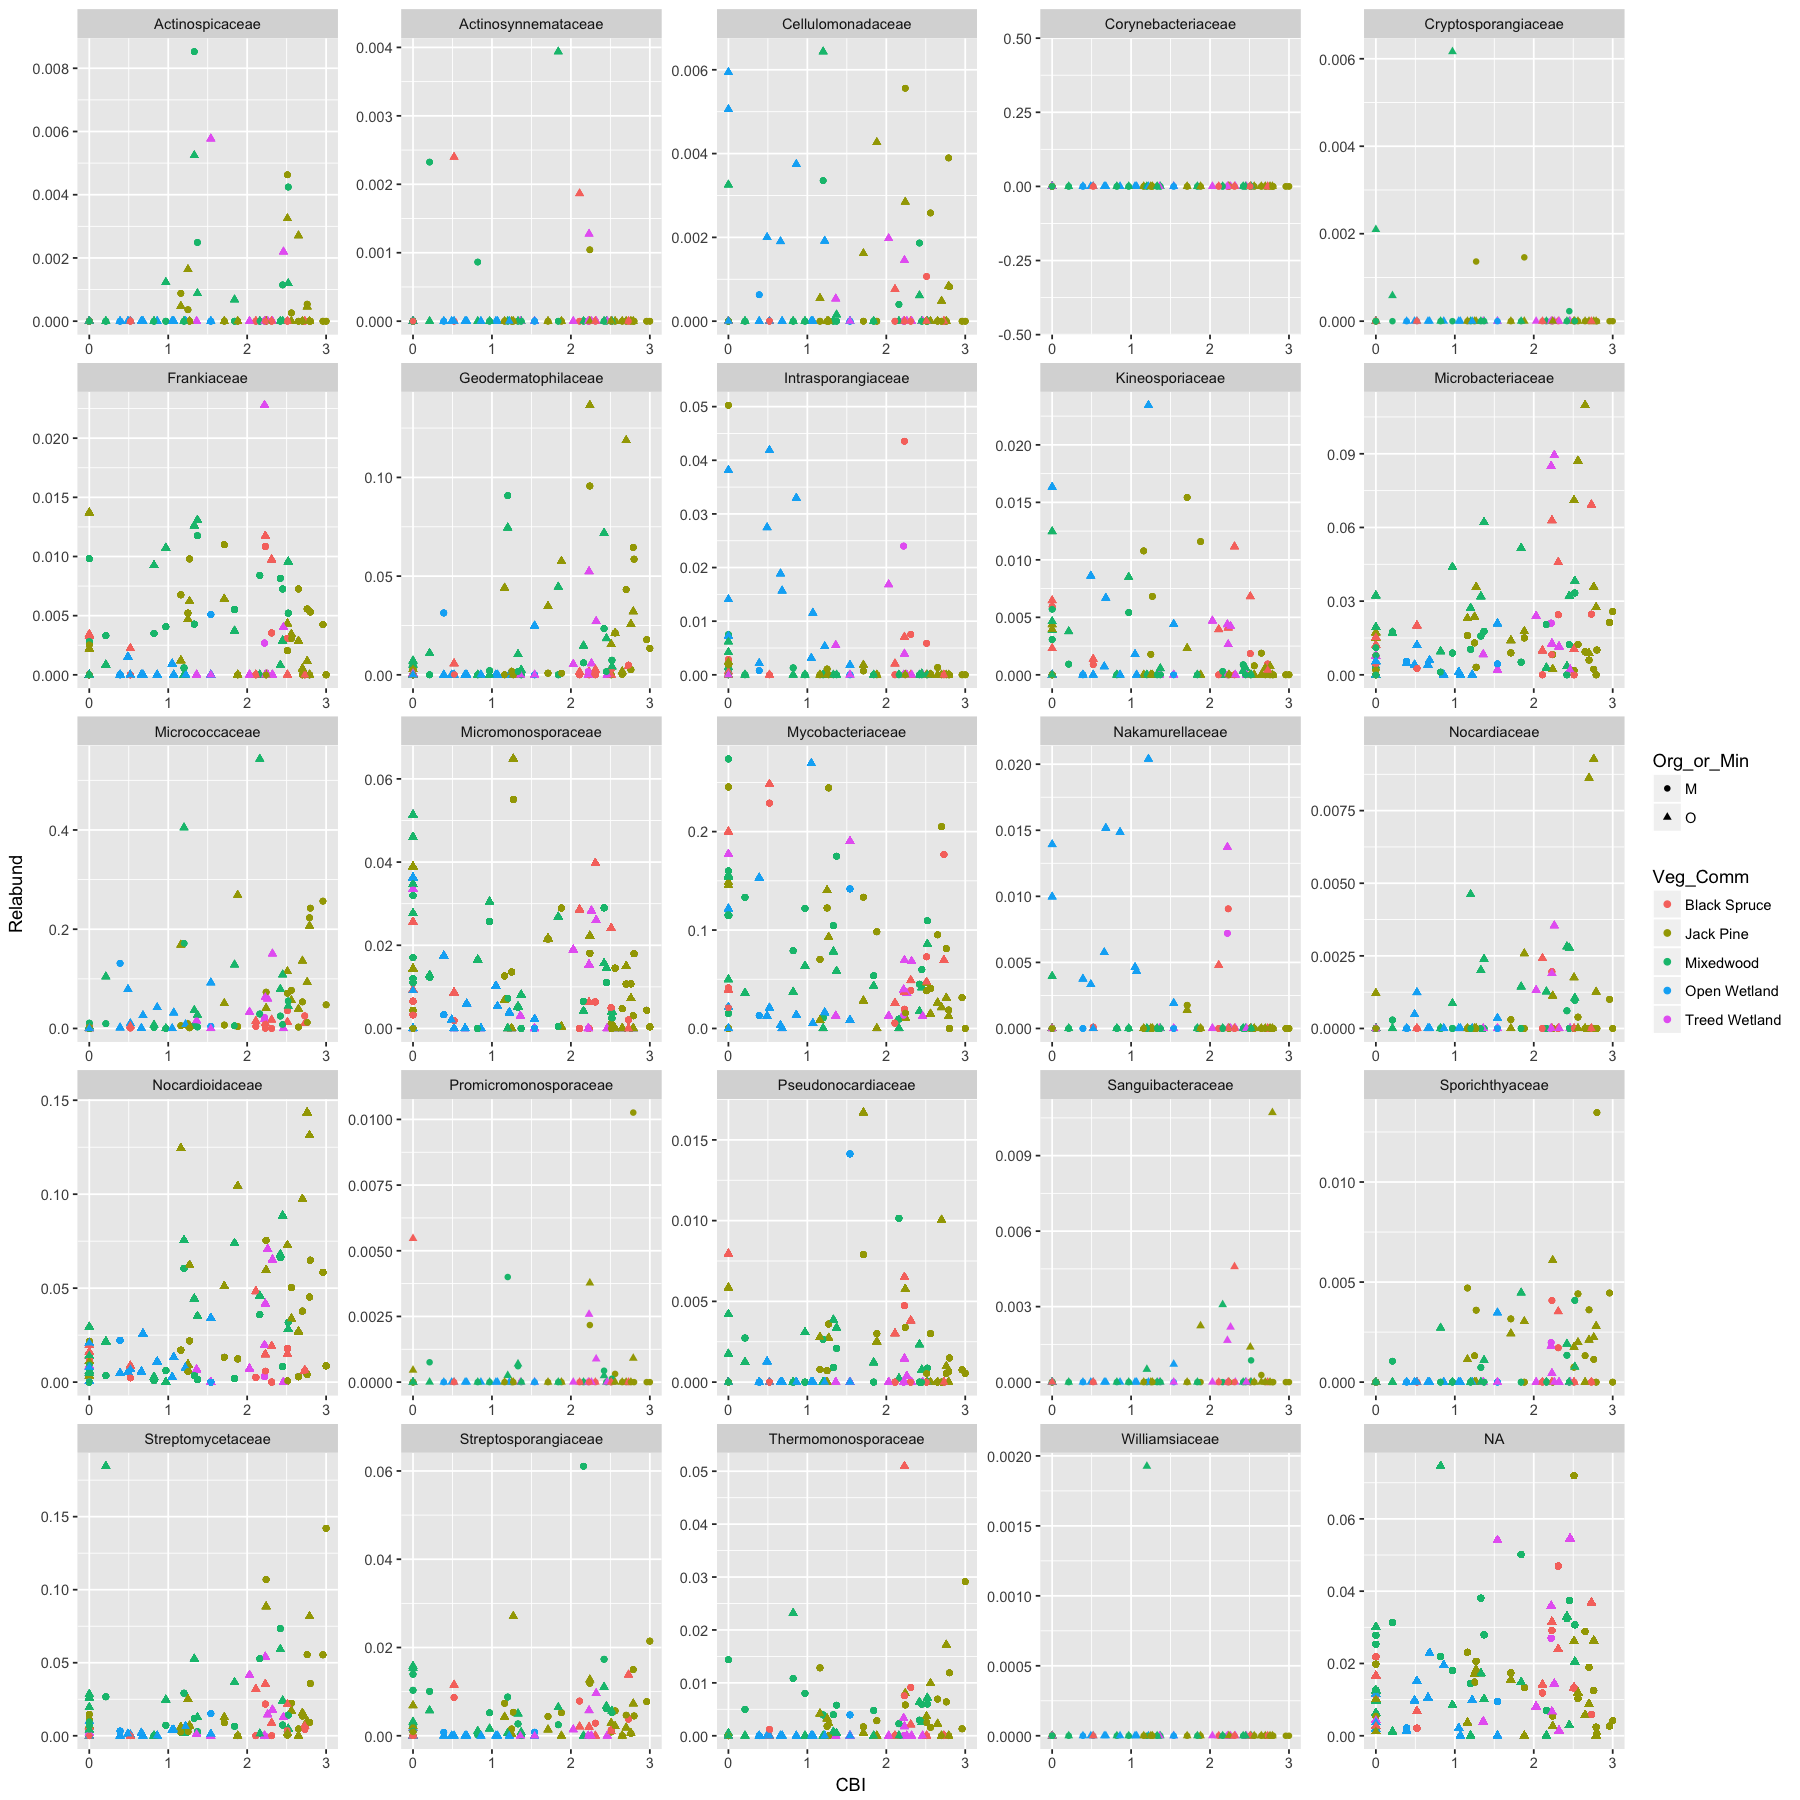

In [18]:
options(repr.plot.width=15, repr.plot.height=15)
minseqs = 50

df = d %>%
    filter(Order=="Actinomycetales")%>%
    filter(TotalSeqs>minseqs)%>%
    group_by(Sample,Family)%>%
    mutate(Relabund=sum(Abundance))%>%
    filter(Org_or_Min != "B")

p = ggplot(df, aes(x=CBI, y=Relabund, color=Veg_Comm, shape=Org_or_Min)) + geom_point() + facet_wrap(~Family, scales="free")
#p = p + guides(color=FALSE)
p

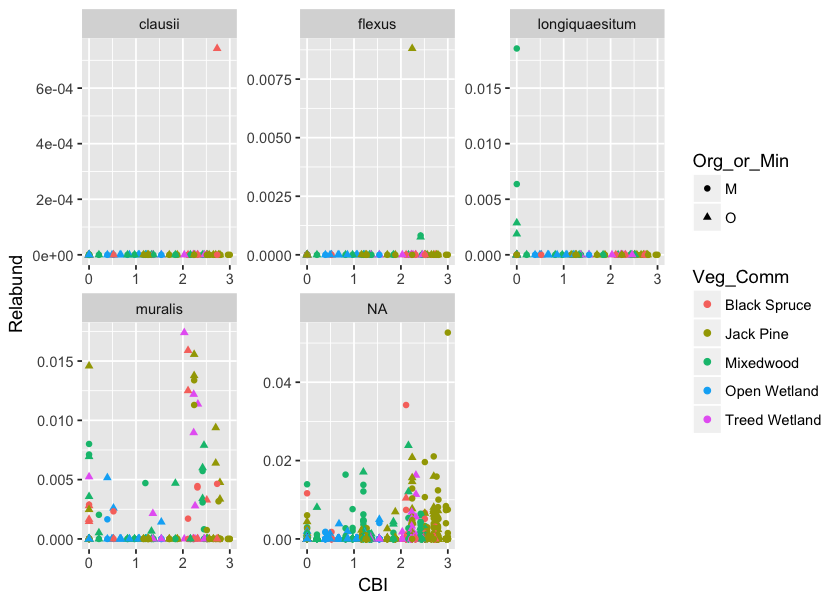

In [19]:
options(repr.plot.width=7, repr.plot.height=5)
df = d %>%
    filter(Genus=="Bacillus")%>%
    group_by(Sample,OTU)%>%
    mutate(Relabund=sum(Abundance))%>%
    filter(Org_or_Min != "B")%>%
    arrange(-Relabund)

p = ggplot(df, aes(x=CBI, y=Relabund, color=Veg_Comm, shape=Org_or_Min)) + geom_point() + facet_wrap(~Species, scales="free")
#p = p + guides(color=FALSE)
p

In [20]:
head(df)

OTU                              Sample     Abundance  Al_mg_kg 
1 9f18686acae6f6c8514731bb20ec902a 15S-WB-04M 0.05266813 NA       
2 cf21defd8f01f4b258cb3b11a2789258 15S-NT-49M 0.03418024 NA       
3 650c629e7022943101a60b5ff3ab3bd9 15S-WB-12O 0.02386165 NA       
4 6b87e49d2d34ce77972b16683d0de79a 15S-NT-34M 0.02106213 NA       
5 41c25e21914fc3817a7f684a875c651b 15S-WB-09O 0.02079195 1642.7400
6 9f18686acae6f6c8514731bb20ec902a 15S-WB-05M 0.01962092 NA       
  Barcodes         Burn_Severity_Index Burned_Unburned CBI  CEC_cmol_kg
1 ACGCTACTTAGCGAGT 5.000               Burned          3.00 3.1120     
2 ACTACGACCGTCGCTA 3.090               Burned          2.11 17.9760    
3 TGCTCGTAGGATATCT 4.725               Burned          2.16 NA         
4 TCTCTATGACTATCTG 4.450               Burned          2.70 16.7360    
5 TATAGCGAGATCGTGT 3.700               Burned          2.24 NA         
6 ACGTGCGCCGTCGCTA 5.000               Burned          2.51 3.1360     
  CFSI     ⋯ Total_C_pct TotalSeqs Kingdom  Phylum     Class   Order     
1 6.000000 ⋯ 0.943       14419     Bacteria Firmicutes Bacilli Bacillales
2 5.025000 ⋯ 4.040        3325     Bacteria Firmicutes Bacilli Bacillales
3 1.275000 ⋯    NA       23800     Bacteria Firmicutes Bacilli Bacillales
4 4.085417 ⋯ 2.760        2706     Bacteria Firmicutes Bacilli Bacillales
5 1.000000 ⋯ 3.390        8348     Bacteria Firmicutes Bacilli Bacillales
6 3.750000 ⋯ 1.050       23689     Bacteria Firmicutes Bacilli Bacillales
  Family      Genus    Species Relabund  
1 Bacillaceae Bacillus NA      0.05266813
2 Bacillaceae Bacillus NA      0.03418024
3 Bacillaceae Bacillus NA      0.02386165
4 Bacillaceae Bacillus NA      0.02106213
5 Bacillaceae Bacillus NA      0.02079195
6 Bacillaceae Bacillus NA      0.01962092

In [33]:
df = d %>%
    group_by(Sample,OTU)%>%
    mutate(Relabund=sum(Abundance))%>%
    arrange(-Relabund)%>%
    group_by(Sample)%>%
    select(Sample,Abundance,TotalSeqs,Kingdom,Phylum,Class,Order,Family,Genus,Species)
df

Sample      Abundance TotalSeqs Kingdom  Phylum        
1       Blank-1     0.7272727    11     Bacteria Actinobacteria
2       15S-NT-49M  0.7013786  3325     Bacteria Proteobacteria
3       Blank-10    0.5416667    48     Bacteria Firmicutes    
4       Blank-13    0.4473684    38     Bacteria Proteobacteria
5       15S-WB-08O  0.3598037 11044     Bacteria Actinobacteria
6       15S-WB-12O  0.3434872 23800     Bacteria Actinobacteria
7       Blank-17    0.3181818    44     Bacteria Proteobacteria
8       15S-NT-48O  0.2988808  6211     Bacteria Firmicutes    
9       Blank-8     0.2812500   128     Bacteria Actinobacteria
10      Blank-22    0.2800000    25     Bacteria Proteobacteria
11      Blank-22    0.2800000    25     Bacteria Proteobacteria
12      Blank-1     0.2727273    11     Bacteria Firmicutes    
13      15S-NT-20O  0.2639707  2878     Bacteria Actinobacteria
14      15S-NT-31O  0.2349695  8574     Bacteria Proteobacteria
15      15S-NT-46M  0.2316845  8656     Bacteria Actinobacteria
16      15S-WB-18M  0.2272743 16116     Bacteria Actinobacteria
17      15S-NT-U08M 0.2128854  5347     Bacteria Actinobacteria
18      Blank-17    0.2045455    44     Bacteria Proteobacteria
19      15S-NT-38O  0.1989225 17673     Bacteria Proteobacteria
20      15S-NT-38O  0.1976894 17673     Bacteria Actinobacteria
21      15S-WB-U04M 0.1890756  2554     Bacteria Actinobacteria
22      Blank-13    0.1842105    38     Bacteria Firmicutes    
23      15S-WB-11M  0.1840345 24364     Bacteria Proteobacteria
24      Blank-4     0.1832061   131     Bacteria Proteobacteria
25      15S-NT-22M  0.1790675  5283     Bacteria Actinobacteria
26      15S-NT-24O  0.1731531  4304     Bacteria Actinobacteria
27      Blank-10    0.1666667    48     Bacteria Proteobacteria
28      Blank-11    0.1666667   108     Bacteria Proteobacteria
29      15S-WB-U01M 0.1614794  4014     Bacteria Proteobacteria
30      Blank-22    0.1600000    25     Bacteria Actinobacteria
⋮       ⋮           ⋮         ⋮         ⋮        ⋮             
1005619 15S-NT-22O  0          8744     Bacteria Proteobacteria
1005620 15S-NT-46M  0          8656     Bacteria Proteobacteria
1005621 15S-WB-10M  0          8859     Bacteria Proteobacteria
1005622 15S-WB-15M  0         14169     Bacteria Proteobacteria
1005623 15S-WB-15O  0         12244     Bacteria Proteobacteria
1005624 15S-NT-47O  0          7204     Bacteria Proteobacteria
1005625 15S-NT-49O  0          5782     Bacteria Proteobacteria
1005626 15S-NT-29O  0          5647     Bacteria Proteobacteria
1005627 15S-NT-31M  0          5197     Bacteria Proteobacteria
1005628 15S-NT-52O  0          4085     Bacteria Proteobacteria
1005629 15S-NT-43O  0          2066     Bacteria Proteobacteria
1005630 15S-NT-U08M 0          5347     Bacteria Proteobacteria
1005631 15S-NT-28M  0         11561     Bacteria Proteobacteria
1005632 15S-NT-47M  0          4900     Bacteria Proteobacteria
1005633 15S-NT-28O  0          8389     Bacteria Proteobacteria
1005634 15S-WB-U03M 0          3744     Bacteria Proteobacteria
1005635 15S-NT-33O  0          3677     Bacteria Proteobacteria
1005636 15S-NT-24M  0          9660     Bacteria Proteobacteria
1005637 15S-NT-U07O 0          4270     Bacteria Proteobacteria
1005638 15S-WB-09M  0          2805     Bacteria Proteobacteria
1005639 15S-NT-42M  0         29608     Bacteria Proteobacteria
1005640 Blank-22    0            25     Bacteria Proteobacteria
1005641 15S-NT-42O  0          2977     Bacteria Proteobacteria
1005642 15S-WB-16O  0         11216     Bacteria Proteobacteria
1005643 15S-WB-U02O 0          3146     Bacteria Proteobacteria
1005644 15S-NT-40M  0          4091     Bacteria Proteobacteria
1005645 15S-NT-22M  0          5283     Bacteria Proteobacteria
1005646 15S-NT-27O  0          7099     Bacteria Proteobacteria
1005647 15S-WB-02O  0         21763     Bacteria Proteobacteria
1005648 Blank-1     0            11     Bacteria Proteobacteria
        Class               Order       